In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from sklearn.datasets import make_blobs

In [5]:
data = make_blobs(n_samples=700, n_features=10, centers=4)

In [10]:
data[0].shape # features

(700, 10)

In [11]:
data[1].shape # clusters column

(700,)

In [12]:
df = pd.DataFrame(data[0], columns=['feature_'+str(i) for i in range(1,11)])

In [13]:
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
0,-7.881170,4.634131,-4.133898,-8.332451,2.167141,1.288820,1.927362,-4.857573,-3.175319,-9.416083
1,4.064249,6.619258,7.957398,-6.255611,8.500881,-1.532523,1.406414,-8.646938,-6.034970,-5.065727
2,7.488118,4.572708,9.112049,-4.917561,7.144051,-0.657970,2.445515,-8.137547,-3.921590,-3.863434
3,-3.629294,10.157354,-9.369155,6.876952,-6.593312,0.795689,3.881249,-8.363422,-3.703357,-1.903407
4,4.167395,4.961092,7.925537,-4.732667,7.448785,0.732583,2.608230,-8.751130,-4.805329,-5.126859


In [14]:
from sklearn.cluster import KMeans

we can use elbow method to find the optimum number of clusters as follows:
the metric we use is SSE which is accesible through .inertia_ attribute

In [38]:
sse_error = []
for n_clusters in range(1,11):
    kmeans = KMeans(n_clusters)
    kmeans.fit(df)
    sse_error.append(kmeans.inertia_)


Text(0,0.5,'SSE')

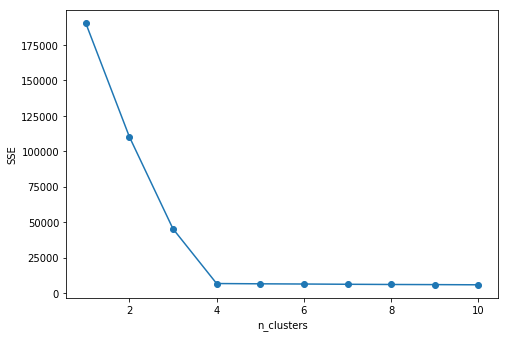

In [43]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(range(1,11), sse_error, marker='o')
ax.set_xlabel('n_clusters')
ax.set_ylabel('SSE')

since we know the original cluster distribution we can also see how many points have been misclassified

In [44]:
kmeans = KMeans(4)
kmeans.fit(df)
km_pred = kmeans.labels_
act_label = data[1]


In [54]:
km_pred[:15]

array([0, 2, 2, 1, 2, 1, 0, 2, 1, 0, 3, 3, 1, 0, 0])

In [55]:
act_label[:15]

array([0, 3, 3, 2, 3, 2, 0, 3, 2, 0, 1, 1, 2, 0, 0])

In [48]:
error = pd.Series(km_pred != act_label)

In [49]:
error.value_counts()

True     525
False    175
dtype: int64

Now it seems that we could not correctly label 175 data points! which is 25% of the data! the fact is cluster numbers do not necessarily match between the two algorithsm (i.e. kmean and sklearn.make_blobs). infact it did a perfect job because SSE values drop very slightly for higher values of clusters

note that other metrics cannot also understand this subtlety!

In [50]:
from sklearn.metrics import confusion_matrix, classification_report

In [51]:
print(confusion_matrix(act_label, km_pred))
print('\n')
print(classification_report(act_label, km_pred))

[[175   0   0   0]
 [  0   0   0 175]
 [  0 175   0   0]
 [  0   0 175   0]]


             precision    recall  f1-score   support

          0       1.00      1.00      1.00       175
          1       0.00      0.00      0.00       175
          2       0.00      0.00      0.00       175
          3       0.00      0.00      0.00       175

avg / total       0.25      0.25      0.25       700



In [56]:
act_label[act_label == 3] = 4
act_label[act_label == 2] = 5
act_label[act_label == 1] = 6
act_label[act_label == 4] = 2
act_label[act_label == 5] = 1
act_label[act_label == 6] = 3

In [57]:
km_pred[:21]

array([0, 2, 2, 1, 2, 1, 0, 2, 1, 0, 3, 3, 1, 0, 0, 2, 1, 1, 1, 1, 3])

In [58]:
act_label[:21]

array([0, 2, 2, 1, 2, 1, 0, 2, 1, 0, 3, 3, 1, 0, 0, 2, 1, 1, 1, 1, 3])

In [59]:
error = pd.Series(km_pred != act_label)

In [60]:
error.value_counts()

False    700
dtype: int64

In [ ]:
perfect!